In [4]:
import ast
import pandas as  pd
from datasets import load_dataset
import matplotlib.pyplot as  plt

dataset =load_dataset("lukebarousse/data_jobs")
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\alpha\OneDrive\Desktop\Data Analyst\__pycache__\LukeYT_DA\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
import  seaborn as  sns


In [6]:
df_DA_US=df[(df['job_title_short']=='Data Analyst')&(df['job_country']=="United States")].copy()
df_DA_US=df_DA_US.dropna(subset='salary_year_avg')

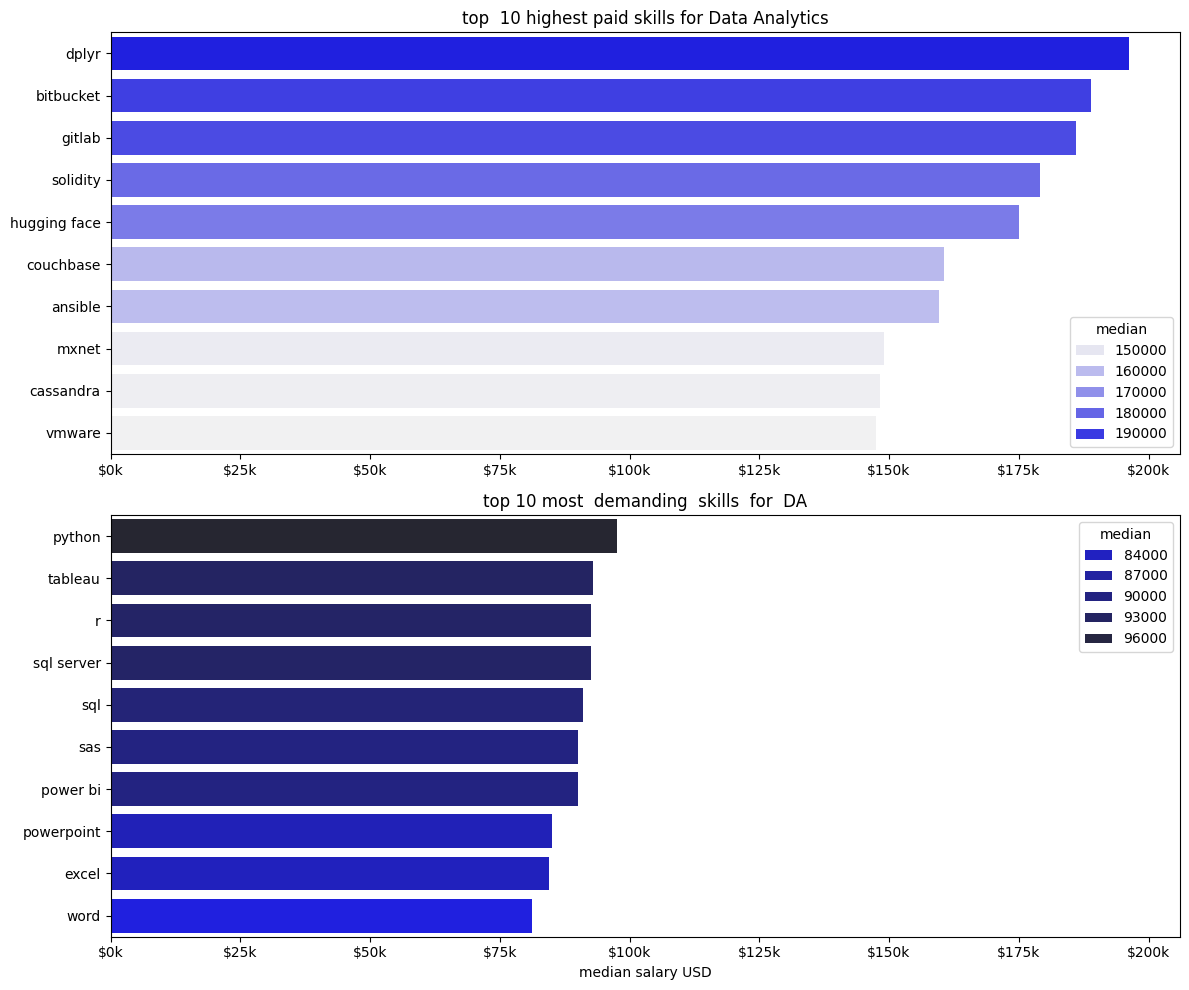

In [12]:
#  nwo we plot  mboth of  them
#size of  charts 
df_DA_US=df_DA_US.explode('job_skills')
df_DA_US[['job_skills','salary_year_avg']]
df_DA_US_group =df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count','median'])
df_DA_top_pay = df_DA_US_group.sort_values(by='median',ascending=False).head(10)
df_DA_skills= df_DA_US_group.sort_values(by='count',ascending=False).head(10).sort_values(by='median',ascending=False).head(10)
fig, ax =plt.subplots(2,1, figsize=(12,10))

#seaborn -

sns.barplot(data=df_DA_top_pay,x='median',y=df_DA_top_pay.index,ax=ax[0],hue='median',palette='light:b')
#df_DA_top_pay[::-1].plot(kind='barh', y='median', ax=ax[0])#revrse  plot
ax[0].set_title('top  10 highest paid skills for Data Analytics')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _:f'${int(x/1000)}k'))

#seaborn-

sns.barplot(data=df_DA_skills,x='median',y=df_DA_skills.index,ax=ax[1],hue='median',palette='dark:b_r')

#df_DA_skills[::-1].plot(kind='barh', y='median', ax=ax[1])
ax[1].set_title('top 10 most  demanding  skills  for  DA')
ax[1].set_ylabel('')
ax[1].set_xlabel('')
ax[1].set_xlabel('median salary USD')


# now  here   values  were  different  to  compare  so  we  make  x limit  same  for  both
ax[1].set_xlim(ax[0].get_xlim())
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _:f'${int(x/1000)}k'))

plt.tight_layout()

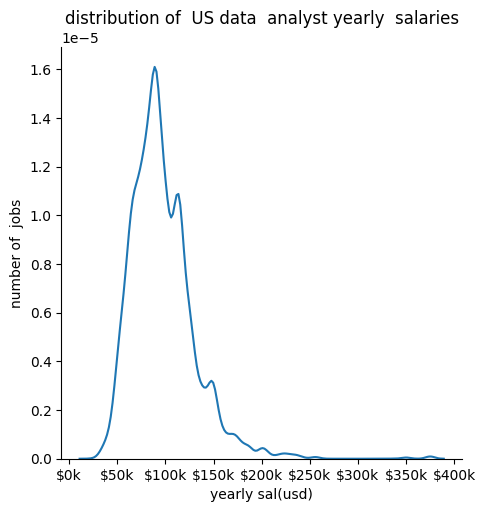

In [14]:
#graph 2
sns.displot(df_DA_US['salary_year_avg'],kind='kde')
plt.title('distribution of  US data  analyst yearly  salaries')
plt.xlabel('yearly sal(usd)')
plt.ylabel('number of  jobs')
ax=plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos:f'${int(y/1000)}k'))

C:\Users\alpha\AppData\Local\Temp\ipykernel_15956\4014029384.py:13: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(job_list, labels=job_titles, vert=False)


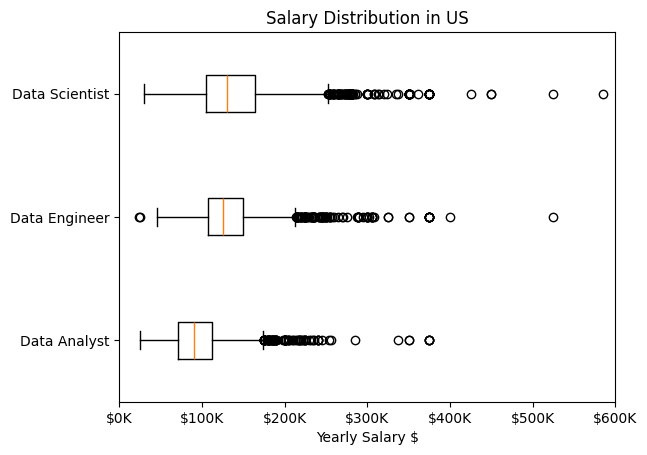

In [18]:

job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']
df_US = df[(df['job_title_short'].isin(job_titles)) & 
           (df['job_country'] == 'United States')].copy()

df_US['job_title_short'].value_counts()

# remove nan values
df_US = df_US.dropna(subset=['salary_year_avg'])

job_list = [df_US[df_US['job_title_short'] == job_title]['salary_year_avg']
            for job_title in job_titles]

plt.boxplot(job_list, labels=job_titles, vert=False)

plt.title('Salary Distribution in US')
plt.xlabel('Yearly Salary $')

ax = plt.gca()
ax.xaxis.set_major_formatter(
    plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K')
)

plt.xlim(0, 600000)
plt.show()


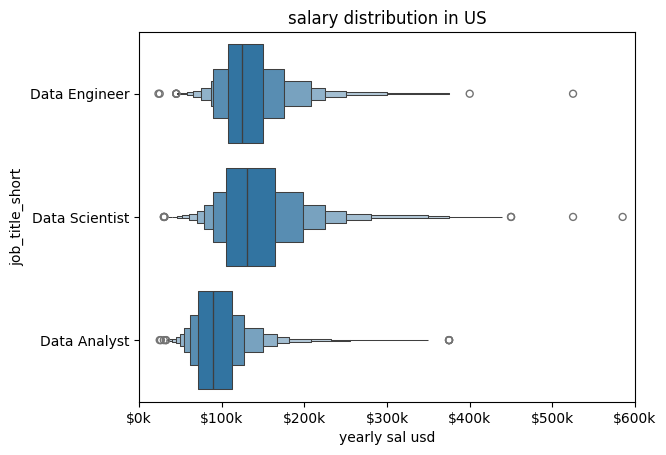

In [19]:
sns.boxenplot(data=df_US,x='salary_year_avg',y='job_title_short')
plt.title('salary distribution in US')
plt.xlabel('yearly sal usd')
plt.xlim(0,600000)
ticks_x=plt.FuncFormatter(lambda y,pos:f'${int(y/1000)}k')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()